# Design Decisions in Data Modeling
*In which we walk through a simple modeling scenario and reflect on:*
* *the various decisions we are called on to make, and*
* *the methods by which we make them.*

## How to complete this assignment
* Read through the text and code below and follow the instructions given.
* Execute all code cells.
* Complete all tasks and answer all questions.
* For open-ended questions you have some leeway regarding the length of your response, but generally 1-2 sentences is probably sufficient. Long paragraphs or one-word answers may be interpreted as cause for concern.

## Scenario: Guessing housing prices given square footage
Imagine you work in real estate. You've collected some data about houses in a neighborbood some clients are interested in.

Let's say further that there is a new house that's going to be built in this same area, and you'd like to predict what its selling price will be based on its square footage.

To start off, execute the code cell below to generate a plot of made up real estate sales data using `matplotlib`.

In [ ]:
import matplotlib.pyplot as plt

# Some synthetic (pretend) real estate sales data
square_footage = [2097, 2430, 2205, 2089, 1847, 2291, 1875,
                  2783, 2927, 1766, 2583, 2057, 2136, 2851,
                  1142, 1174, 1040, 2665, 2556, 2740]

sales_price = [394525, 410453, 387090, 346383, 276036,
               406840, 348564, 452688, 534493, 285945,
               438432, 354924, 401068, 507066, 224409,
               233702, 188309, 410170, 426488, 464130]

# Plot the data
plt.scatter(square_footage, sales_price, label="Sales Data")
plt.xlabel("Square Footage")
plt.ylabel("Sales Price ($)")
plt.title("House Sales Data")
plt.legend()
plt.grid(True)
plt.show()


### Your Approach
To be able to predict the price of a new house, your plan is to create a mathematical function (aka a model) that will take the square footage as input and calculate a reasonable guess of the selling price as its about.

By squinting at the data above, you determine that the relationship between square footage and housing price is roughly linear. In other words, it looks like the points are more or less gathered around a line. Therefore, you'll try to model it using a line.

You know the generic equation for a line is:

$y = mx + b$

In this example, $x$ represents square footage and $y$ represents price. You have lots of examples of those already. What you need to find are the values for the **parameters** $m$ and $b$ that give the best guess for $y$.


### Your Solution:
After thinking about it for a bit, you come up with the solution in the cell below. Run it to see the output:

In [ ]:
import numpy as np

def loss_function(x, y, m, b):
    """
    Calculates the loss (error) between the predicted
    values of
    y_pred = mx + b and the actual values of y.

    Args:
        x: A list or numpy array of x-coordinates.
        y: A list or numpy array of y-coordinates.
        m: The slope (m) of the line.
        b: The y-intercept (b) of the line.

    Returns:
        The mean absolute difference between the predicted
        and actual values of y.
    """
    x = np.array(x)
    y = np.array(y)

    y_pred = m * x + b
    return np.mean(np.abs(y - y_pred))

def calculate_best_fit_line(x, y):
    """
    Calculates the best-fit line.

    Args:
        x: A list or numpy array of x-coordinates.
        y: A list or numpy array of y-coordinates.

    Returns:
        A tuple containing the slope (m) and y-intercept (b) of the best-fit line.
    """

    x = np.array(x)
    y = np.array(y)

    # Initial guess for slope and intercept (can be improved)
    m = 1
    b = 0

    # Perform gradient descent to minimize error
    learning_rate = 0.000001
    iterations = 100000

    for _ in range(iterations):
        # Calculate predicted values
        y_pred = m * x + b

        # Calculate errors
        errors = y - y_pred

        # Update m and b using the gradient of the loss function
        m_gradient = -np.sum(np.sign(errors) * x) / len(x)  # Corrected gradient
        b_gradient = -np.sum(np.sign(errors)) / len(x)  # Corrected gradient

        # nudge m and b a little closer to the best values
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient

    return m, b

# Example usage with the provided data:
m1, b1 = calculate_best_fit_line(square_footage, sales_price)

print(f"Best-fit line: y = {m1:.4f}x + {b1:.4f}")
print("Average error:", loss_function(square_footage, sales_price, m1, b1))

# Plotting to visualize the best-fit line (optional)
import matplotlib.pyplot as plt
plt.scatter(square_footage, sales_price, label='Sales Data')
plt.plot(square_footage, m1 * np.array(square_footage) + b1, color='red', label='Best-fit Line')
plt.xlabel('Square Footage')
plt.ylabel('Sales Price ($)')
plt.title('House Sales Data with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()


Hooray! 🎉  Now we have the "best-fit" line for our data.



### Task 1: What did we do?
* Read through the code in the solution shown above to understand what it does.
* Write your answers to the following questions in the cell below.
  
  Q1. What was the definition of "best" we used when finding our "best-fit" line?

  Q2. Relatedly, how did we define "error"?

* Optionally, if you find the code above difficult to decipher, you can use this space to explain which parts are confusing you.

### A Second Solution
You are showing off your amazing graph to your pals at the... real estate agency... and your coworker points out that there is already a `numpy` function called `lstsq` that will find a best fitting line for you using a "least squares method." After some helpful pointers, you realize you can replace your custom functions with the following more concise approach:  



In [ ]:
# Calculate the best-fit line using linear least squares
x = np.array(square_footage)
y = np.array(sales_price)
A = np.vstack([x, np.ones(len(x))]).T
m2, b2 = np.linalg.lstsq(A, y, rcond=None)[0]

print(f"Best-fit line: y = {m2:.4f}x + {b2:.4f}")

# Plot the data again with the best-fit line
plt.scatter(square_footage, sales_price, label="Sales Data")
plt.plot(x, m2 * x + b2, 'r', label="Best Fit Line")
plt.xlabel("Square Footage")
plt.ylabel("Sales Price ($)")
plt.title("House Sales Data with Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()


You have to admit this also looks pretty good, and it was definitely convenient. The only problem is that you now have two "best-fit" lines and, looking closely at the printed output reveals they are not the same line.

You decide to put them both on the same graph for comparison:

In [ ]:
print(f"Best-fit line 1: y = {m1:.4f}x + {b1:.4f}")
print(f"Best-fit line 2: y = {m2:.4f}x + {b2:.4f}")

# Plot the data again with the best-fit line
plt.scatter(square_footage, sales_price, label="Sales Data")
plt.plot(x, m1 * x + b1, 'r', label="Best Fit Line 1")
plt.plot(x, m2 * x + b2, 'b', label="Best Fit Line 2")
plt.xlabel("Square Footage")
plt.ylabel("Sales Price ($)")
plt.title("House Sales Data with Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()


### Task 2: What's the difference?
Q3. Based on the documentation for [`numpy.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html), how does this method define "best-fit"?

Q4.  How does this definition of "best" and "error" differ from the first solution?

### Task 3: Which is better?
Q5. List a few pros and cons for each of the two approaches above. You can do a little internet research to answer this question if you want (but please cite your sources).



### Third Solution: Accept no Losses
Yet another of your real estate buddies has proposed an improvement on your graph. His argument is that the only reason you can't eliminate error completely is that you're trying to fit the data to a straight line when it's obviously not all in a straight line.

If you just use a polynomial instead, he explains, you can make your error much lower. Run the cell below to see his solution:

In [ ]:
coefficients = np.polyfit(square_footage, sales_price, len(square_footage) - 1)
polynomial = np.poly1d(coefficients)
print("The best fitting polynomial is:")
print(polynomial)

# Generate points for the fitted curve
x_fit = np.linspace(min(square_footage), max(square_footage), 500)
y_fit = polynomial(x_fit)

error = np.mean(np.abs(sales_price - polynomial(square_footage)))

print("Average error:", error)

#Plot the data and the best fit curve
plt.scatter(square_footage, sales_price, label="Sales Data")
plt.plot(x_fit, y_fit, color='red', label="Best Fit Curve")
plt.xlabel("Square Footage")
plt.ylabel("Sales Price ($)")
plt.title("House Sales Data with Best Fit Curve")
plt.ylim(150000, 550000) #Set y-axis limits
plt.legend()
plt.grid(True)
plt.show()


(Note that some parts of the polynomial are cut off in the graph above because they go above or below the original range of y values, and to make the comparison more clear I decided to keep the range the same.)

### Task 4: Evaluate the new model
Q6. Is the polynomial model better or worse than the linear one?

Q7. What process or reasoning are you using to make this decision?

### Task 5: Summing Up
Q8. List at least three design choices that affect the modeling task above?

Q9. On what basis are these choices decided?

Q10. Briefly (1-3 sentences) comment on how this exercise relates to Timnit Gebru's commentary in Race and Gender?

## Submitting your Notebook
The process for submitting this assignment is the same as assignment 1. For convenience, here is a reminder:

### Step 1: Check for completion
**This assignment will be graded based on completion. To get credit, it must be complete!** This means you must:
* Run all the code cells.
* Complete all the tasks and exercises.
* Answer all the questions.

Take a moment now to look back over your notebook and check that it's ready to submit.


### Step 2: Move your notebook to your assignment submission folder
You submit your notebook by moving it to your assignment submission folder, a Google Drive folder that has been shared with you for this purpose.
* The name of your assignment submission folder is `csci375-submit-here-<your_obieID>`, where `<your_obieID>` should be replaced with your personal ObieID.
* For example, if your ObieID is `mzucker`, your assignment submission folder would be called `csci375-submit-here-mzucker`.
* You should be able to find this folder by searching in Google Drive, or looking under the "Shared with me" section.
* To avoid chaos, first please double check that you have renamed your notebook file to append your obieID to the filename.
* When you are ready to submit, locate your copy of this file in your Google Drive, and move it into your assignment submission folder.

Note that you will still be able to edit your file even after it is shared. However, after the submission deadline has passed a copy of your submission will be made for grading, and will not be able to receive any further edits.

Hooray! As previously, we end with the universal symbol of accomplishment:

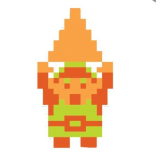